In [5]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

(array([1402., 2664., 2703., 1831.,  899.,  353.,  119.,   26.,    3.,
           0.,    0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Patch objects>)

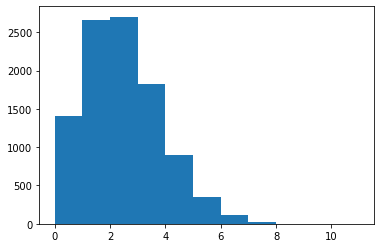

In [9]:
trials = 10_000
x = stats.poisson(2).rvs(trials)
plt.hist(x, bins=range(0,12))

### What is the probability that no cars drive up in the noon hour?

In [13]:
no_car = stats.poisson(2).pmf(0)
print(f'The probability of no cars at noon is {no_car}.')

The probability of no cars at noon is 0.1353352832366127.


In [75]:
(np.random.poisson(2, 10000) == 0).mean()

0.1355

### What is the probability that 3 or more cars come through the drive through?

In [14]:
three_plus = stats.poisson(2).sf(2)
print(f'The probability of three or more cars is {three_plus}.')

The probability of three or more cars is 0.32332358381693654.


In [76]:
(np.random.poisson(2, 10000) >= 3).mean()

0.3237

### How likely is it that the drive through gets at least 1 car?

In [15]:
one_plus = stats.poisson(2).sf(0)
print(f'The probability of at least one car is {one_plus}.')

The probability of at least one car is 0.8646647167633873.


In [77]:
(np.random.poisson(2, 10000) >= 1).mean()

0.8696

### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

### What grade point average is required to be in the top 5% of the graduating class?


In [16]:
gpa = stats.norm(3, .3)
gpa.isf(.05)

3.4934560880854417

In [78]:
np.quantile(np.random.normal(3, .3, 10000), .95)

3.4900634636208623

### What GPA constitutes the bottom 15% of the class?


In [17]:
gpa.ppf(.15)

2.689069983151863

In [79]:
np.quantile(np.random.normal(3, .3, 10000), .15)

2.6799355656452812

### An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?


In [26]:
min_range = gpa.ppf(.2)
max_range = gpa.ppf(.3)

print(f'The range for the third decile from the bottom of the class is {min_range} - {max_range}')
print('A student with a 2.8 gpa would qualify for this scholarship because they are within the range.')

The range for the third decile from the bottom of the class is 2.7475136299281258 - 2.842679846187588
A student with a 2.8 gpa would qualify for this scholarship because they are within the range.


In [80]:
np.quantile(np.random.normal(3, .3, 10000), [.2, .3])

array([2.73688775, 2.82972552])

### If I have a GPA of 3.5, what percentile am I in?


In [30]:
gpa.cdf(3.5)

0.9522096477271853

In [82]:
1- (np.random.normal(3, .3, 10000) >= 3.5).mean()

0.9541

### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?



In [84]:
stats.binom(4326, .02).sf(96)

0.1397582363130086

In [91]:
(np.random.choice([1, 0], p=[.02, .98], size = (10000, 4326)).sum(axis=1) >= 97).mean()

0.1394

### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

### What is the probability that at least one of your first 60 answers is correct?


In [34]:
stats.binom(60, 1/101).sf(0)

0.44955038406224

In [86]:
(np.random.uniform(size=(1000, 60)).round(2) == np.random.uniform(size=(1000,60)).round(2)).any(axis=1).mean()

0.449

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? 

In [37]:
breaks = int(66 * .9)
stats.binom(breaks, .03).sf(0)

0.8342199288437355

In [95]:
(np.random.choice([1, 0], p=[.03, .97], size = (10000, breaks)).sum(axis=1) > 0).mean()

0.8331

### How likely is it that it goes two days without getting cleaned up?

In [38]:
1 - stats.binom(breaks*2, .03).sf(0)

0.02748303199257618

In [97]:
(np.random.choice([1,0], p=[.03, .97], size=(10000, breaks*2)).sum(axis=1) == 0).mean()

0.0281

### All week?

In [39]:
1 - stats.binom(breaks*7, .03).sf(0)

3.4413294569546338e-06

In [101]:
(np.random.choice([1,0], p=[.03, .97], size=(1000000, breaks*7)).sum(axis=1) == 0).mean()

1e-06

### You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [102]:
mean = 15 * 2
sd = 3 * 2
print('There are 60 minutes in an hour and we need 15 minutes to eat.')
time_left = 60 - 15
print(f'There is {time_left} minutes remaining.')
print('10 minutes of time remaining is spent getting the food after ordering.')
time_left = time_left - 10
print(f'There is {time_left} minutes remaining.')
stats.norm(mean, sd).cdf(time_left)

There are 60 minutes in an hour and we need 15 minutes to eat.
There is 45 minutes remaining.
10 minutes of time remaining is spent getting the food after ordering.
There is 35 minutes remaining.


0.7976716190363569

In [106]:
(np.random.normal(mean, sd, 10000) <= time_left).mean()

0.7925

### Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [61]:
from env import host, username, password
url = (f'mysql+pymysql://{username}:{password}@{host}/employees')
employees = pd.read_sql('SELECT * FROM employees', url)
employees

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


### a. What percent of employees earn less than 60,000?


In [62]:
salaries = pd.read_sql('SELECT * FROM salaries WHERE to_date > CURDATE()', url)

In [63]:
salaries

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


In [64]:
empsal = pd.merge(employees, salaries, left_on = 'emp_no', right_on = 'emp_no')
empsal

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01
...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,52868,2002-06-01,9999-01-01
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,69501,2002-05-12,9999-01-01
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01


In [65]:
avg_sal = empsal.salary.mean()
avg_sal

72012.23585730705

In [68]:
sdev_sal = empsal.salary.std()
sdev_sal

17309.99538025198

In [69]:
stats.norm(avg_sal, sdev_sal).cdf(59_999.99)

0.2438572436502896

In [107]:
(np.random.normal(avg_sal, sdev_sal, 10000) < 60_000).mean()

0.2446

### b. What percent of employees earn more than 95,000?

In [71]:
stats.norm(avg_sal, sdev_sal).sf(95_000)

0.09208819199804053

In [109]:
(np.random.normal(avg_sal, sdev_sal, 10000) > 95_000).mean()

0.0968

### c. What percent of employees earn between 65,000 and 80,000?

In [73]:
1 - stats.norm(avg_sal, sdev_sal).cdf(64_999.99) - stats.norm(avg_sal, sdev_sal).sf(80_000)

0.3350607808585214

In [112]:
((salaries.salary >= 65000) & (salaries.salary <= 80000)).mean()

0.32515700221552196

### d. What do the top 5% of employees make?

In [74]:
stats.norm(avg_sal, sdev_sal).isf(.05)

100484.64454102777

In [113]:
salaries.salary.quantile(.95)

104225.84999999998